In [53]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
driver = webdriver.Chrome()

jobs={"roles":[],
     "companies":[],
     "locations":[],
     "salary":[]}


In [54]:

for i in range(1):
    driver.get("https://www.topcv.vn/viec-lam-tot-nhat?page={}".format(i))
    time.sleep(60)
    lst=driver.find_elements(By.CLASS_NAME,"body")
    
    for job in lst:
        driver.implicitly_wait(10)
        role=job.find_element(By.CSS_SELECTOR, "h3.title").text
        company=job.find_element(By.CSS_SELECTOR,"a.company").text
        location=job.find_element(By.CSS_SELECTOR,"label.address").text
        salary=job.find_element(By.CSS_SELECTOR,"label.title-salary").text
        
        jobs["roles"].append(role)
        jobs["companies"].append(company)
        jobs["locations"].append(location)
        jobs["salary"].append(salary)


In [55]:
import pandas as pd
DS_jobs_df=pd.DataFrame(jobs)

In [56]:
DS_jobs_df.to_csv("dulieucongviecvn.csv")

In [57]:
DS_jobs_df=pd.read_csv("dulieucongviecvn.csv", index_col=0)
DS_jobs_df.head(5)

,roles,companies,locations,salary
0,Nhân Viên Tư Vấn - Sản Phẩm Tiềm Năng - Telesa...,Công ty CP Đầu tư và Dịch vụ Đất Xanh Miền Nam,Hồ Chí Minh,30 - 50 triệu
1,Nhân Viên Kinh Doanh Ban Phát Triển - Chi Nhán...,CÔNG TY TNHH YAKULT VN,Hà Nội,10 - 14 triệu
2,TOP\nGiáo Viên Toán,TỔ CHỨC GIÁO DỤC FPT,Thanh Hoá,Thoả thuận
3,Nhân Viên Kinh Doanh/ Bán Hàng Kỹ Thuật/ Sale ...,CÔNG TY TNHH TÂN PHÚ HIẾU,Hà Nội,10 - 35 triệu
4,Nhân Viên Tư Vấn/ Chăm Sóc Khách Hàng/ Custome...,Công ty TNHH Concentrix Service Vietnam,Hồ Chí Minh,10 - 12 triệu


In [58]:
DS_jobs_df.isnull().sum()

roles        0
companies    0
locations    0
salary       0
dtype: int64

In [59]:
DS_jobs_df=DS_jobs_df.dropna()
DS_jobs_df.shape

(50, 4)

In [60]:
DS_jobs_df[DS_jobs_df.duplicated(subset=["roles","companies","locations","salary"])].shape

(0, 4)

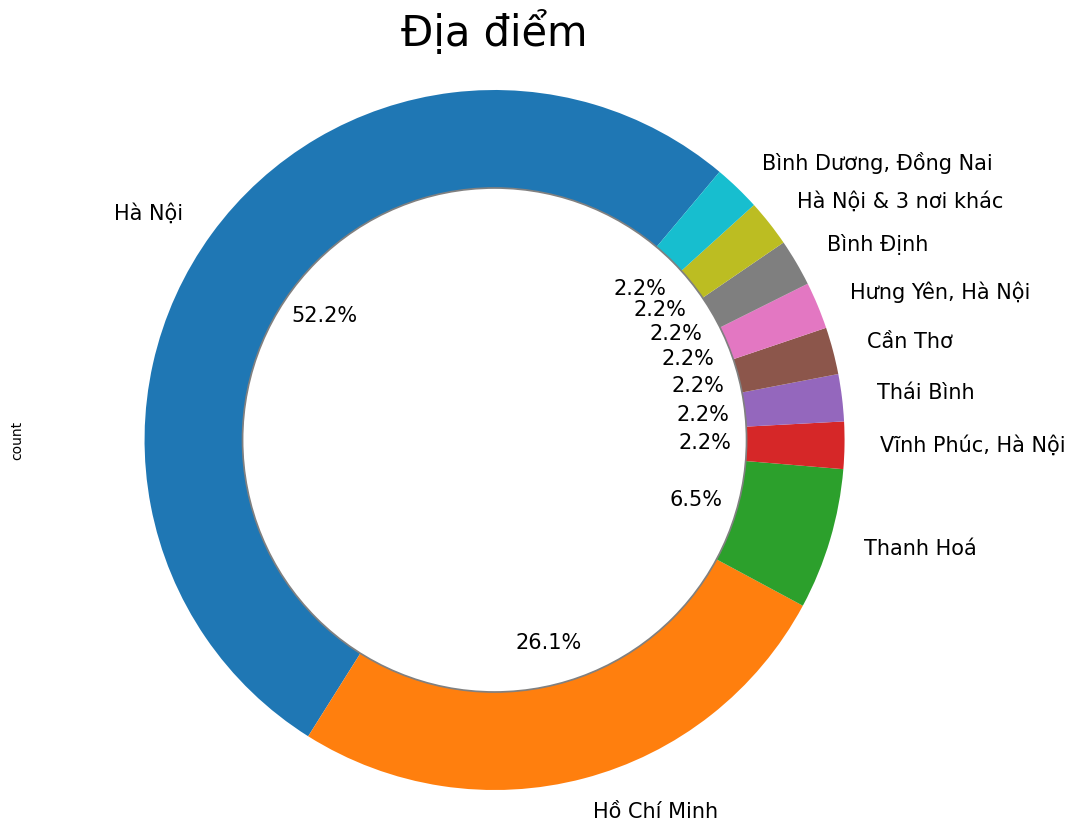

In [63]:
DS_jobs_df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Địa điểm",fontsize=30)

centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

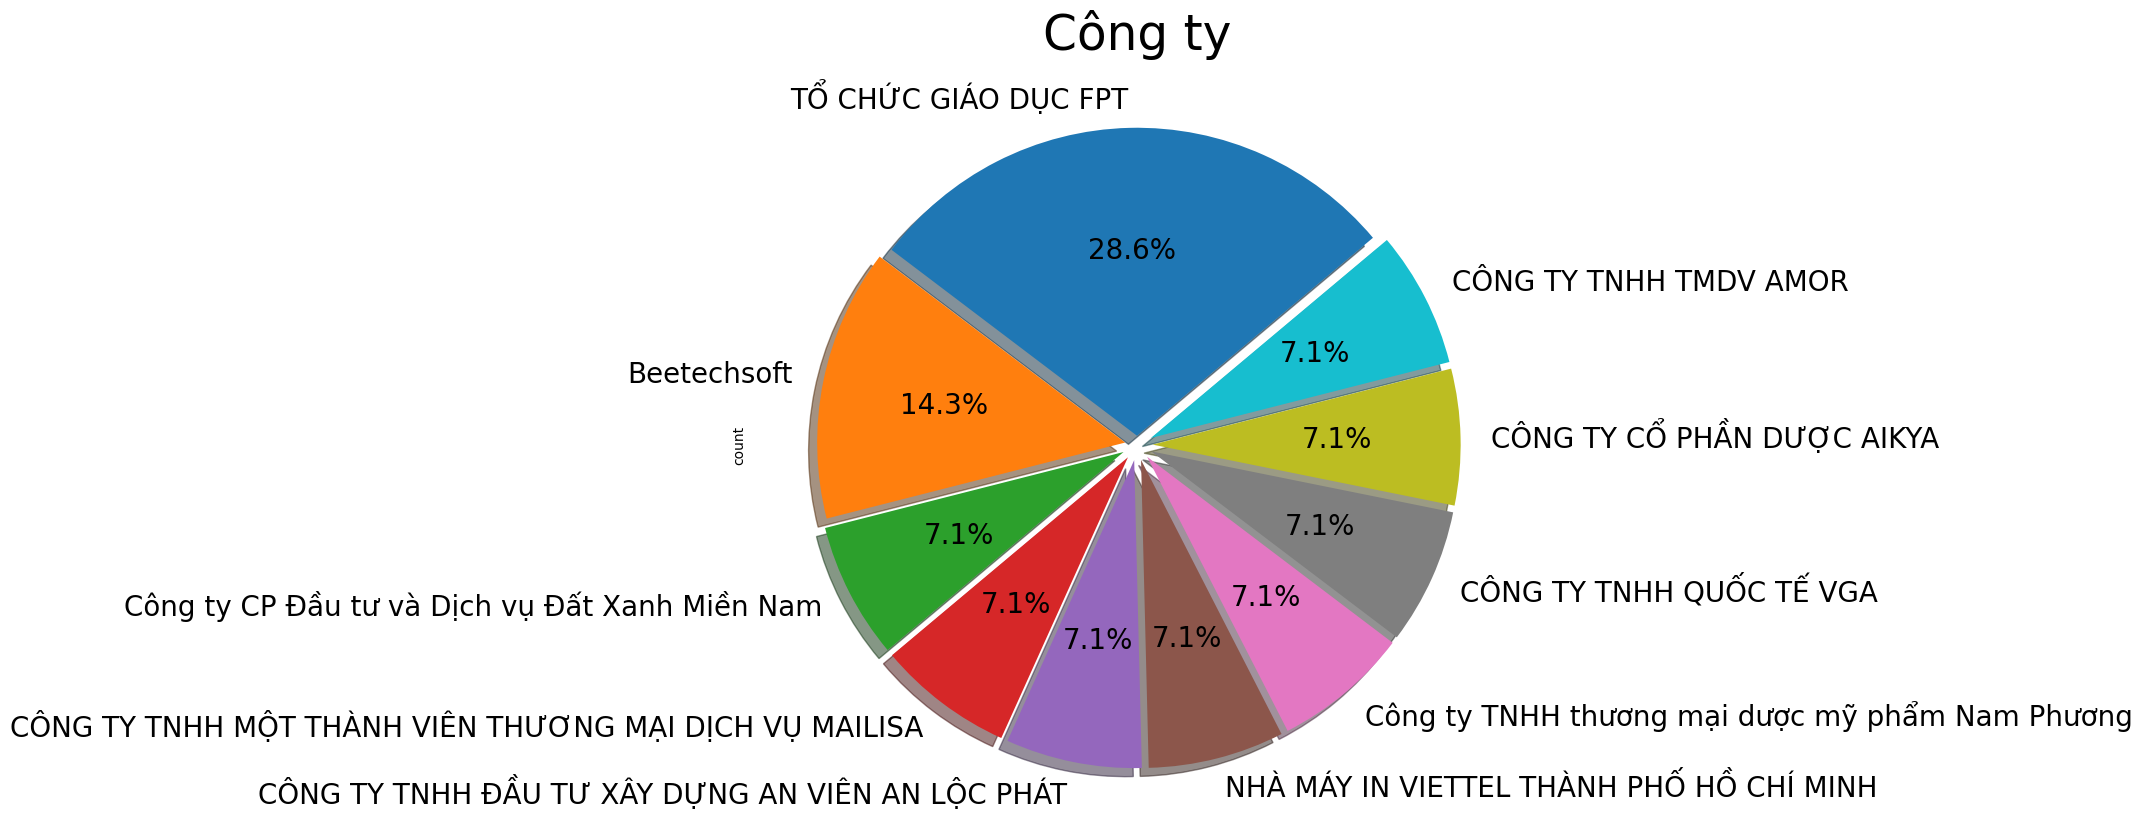

In [64]:
DS_jobs_df["companies"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Công ty",fontsize=35)
plt.show()

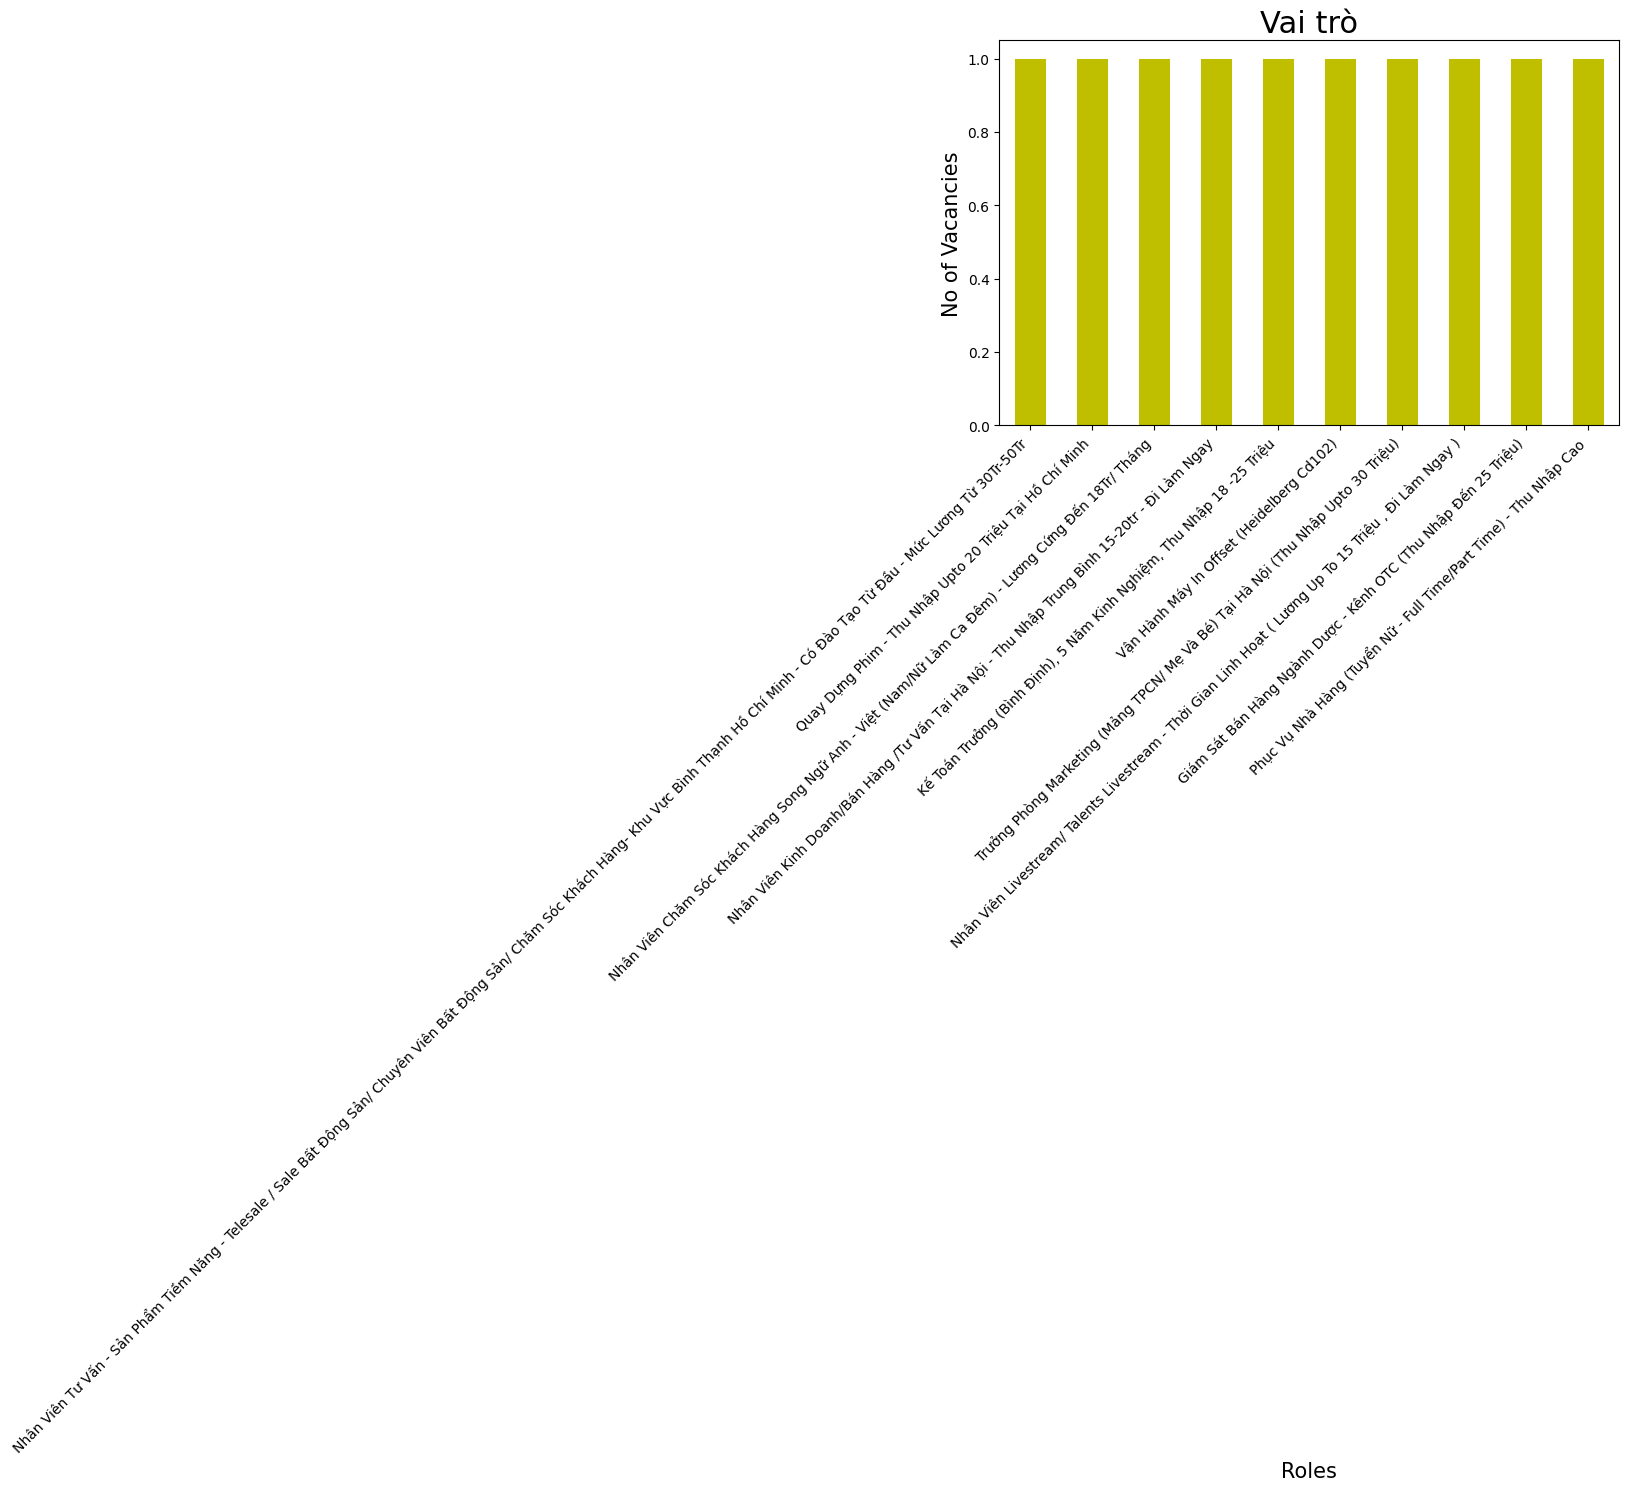

In [65]:
DS_jobs_df["roles"].value_counts()[:10].plot.bar(figsize=(8,5),fontsize=10,color="y")#(figsize=(10,10),explode=[0.05,0.04,0.05,0,0,0,0,0,0,0],shadow=True, startangle=50,autopct='%1.1f%%')
plt.xticks(rotation=45,ha='right')
plt.title("Vai trò",fontsize=22)
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Roles",fontsize=15)
plt.show()

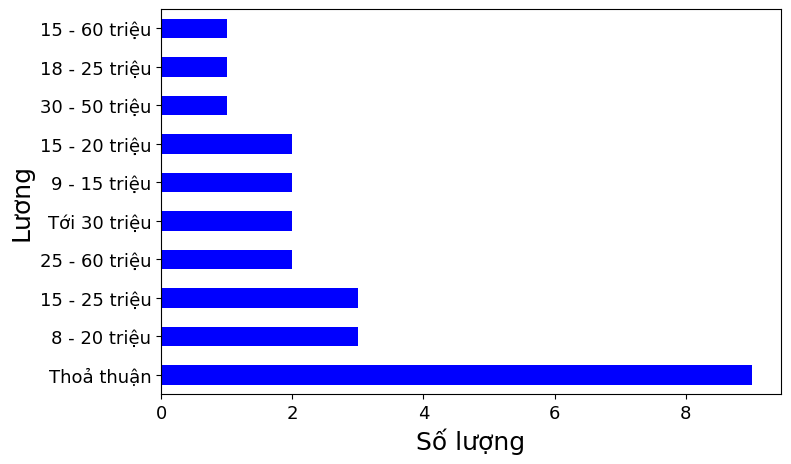

In [66]:
DS_jobs_df["salary"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=13,color="b")
plt.xlabel("Số lượng",fontsize=18)
plt.ylabel("Lương",fontsize=18)
plt.show()

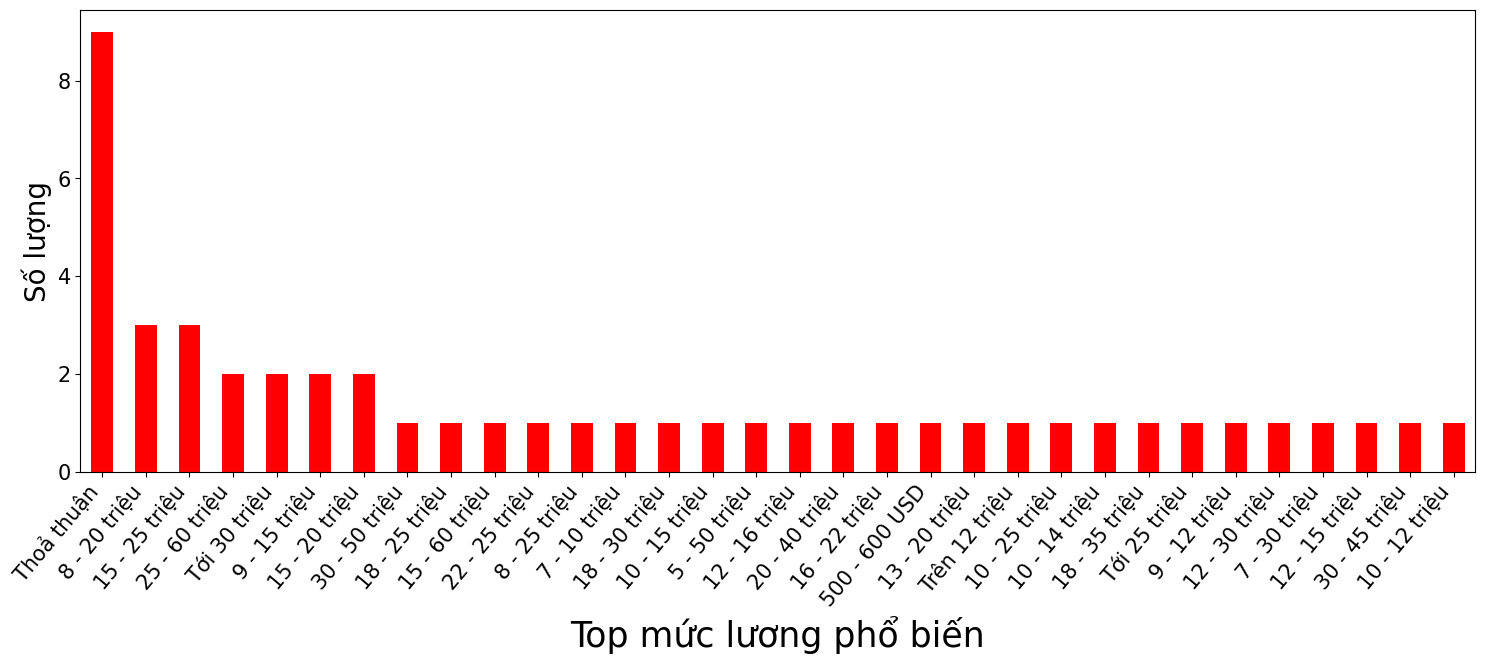

In [67]:
DS_jobs_df.salary.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="r")
plt.xticks(rotation=50,ha='right')
#plt.title("Top salary for Data science",fontsize=25)
plt.ylabel("Số lượng",fontsize=20)
plt.xlabel("Top mức lương phổ biến",fontsize=25)
plt.show()

In [1]:
jj=pd.DataFrame(DS_jobs_df.salary.apply(pd.Series).stack().value_counts()).reset_index()
jj.columns=["mức lương","số lượng"]
jj.head()

NameError: name 'pd' is not defined